# Random forest cannot extrapolate

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
def rnd_data(N):
    a=0.314
    b=1.24
    x=np.random.random(N)*10+1
    y=a*x+b+np.random.random(N)-0.5
    return x,y

x,y=rnd_data(50)

Let's now fit a linear regression and a random forest regression to the data. We then plot the predict values, not only within the range of the trainings data but also outside that range.

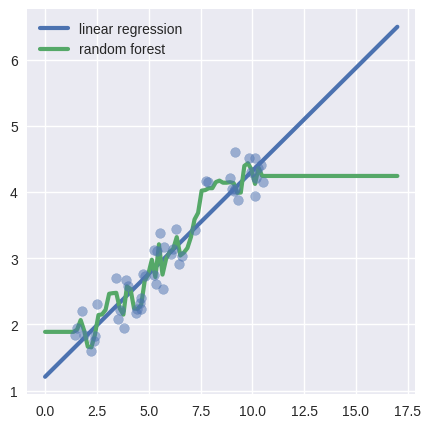

In [3]:
lr=LinearRegression()
lr.fit(x.reshape(-1,1),y)

rf=RandomForestRegressor()
rf.fit(x.reshape(-1,1),y)


xx=np.linspace(0,17,100)
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(xx,lr.predict(xx.reshape(-1,1)),linewidth=3,label="linear regression")
ax.plot(xx,rf.predict(xx.reshape(-1,1)),linewidth=3,label="random forest")
ax.scatter(x,y,alpha=0.5,zorder=10)
ax.legend()

Obviously, linear regression has an advantage as the data is basically linear. That random forest is jittery while interpolating the data is not the point, though. That is what we expect, and indeed, random forest interpolates reasonably well. The more interesting observation concerns the range, where we *extrapolate*: random forest effectively cannot extrapolate at all. Indeed, every prediction is always an average of certain training data values and thus can never become larger or smaller than the range of the training data.